<a href="https://colab.research.google.com/github/barauna-lo/Neurocomputing/blob/main/Project_05_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# Project 05 - Recurrent Neuron Network RNN

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)


## PROJETO 5 – Redes Neurais Recoorentes (VAE)

Implementar um modelo LSTM ou GRU para uma das tarefas abaixo:

1. Classificação de série temporais. O modelo deve receber uma
janela temporal (qualquer tipo de dado) e classificar o conteúdo
da janela.

2. Previsão. Treinar um modelo para predizer o valor de uma
variável no instante t+k. O modelo deve receber os dados da
série temporal (instantes anteriores a t – verificar tamanho da
janela) e predizer um favor futuro. k a distância da predição. Por
exemplo, podemos alimentar um modelo com dados de uma
dada empresa (i.e. PETR3) e tentar predizer qual será o valor da
ação daqui 5 dias (k==5)

3. Autoencoder recorrente. O modelo deve mapear a série
temporal na própria série. O objetivo será avaliar como os dados
estão representados no espaço latente

# Project Report

## Introduction 

In contrast to a "multilayer perceptron", a simple recurrent neural network (Simple RNN) structure has two sets of weights. The set of weights $\mathbf{W}_x$ for the input  $\mathbf{x}_{(t)}$ and the set of weights $\mathbf{W}_y$  for the time before the input $\mathbf{y}_{(t-1)}$, which computes the neuron’s output through an activation function $\sigma$, which is usually a rectified linear unit (ReLu) function.


\begin{equation}
    \mathbf{y}_{(t)} = \phi\left( \mathbf{W}_x^\mathsf{T} \mathbf{x}_{(t)} + \mathbf{W}_y^\mathsf{T} \mathbf{y}_{(t-1)} + \mathbf{b} \right)
\end{equation}

were \mathbf{b} is a bias. 

This allows weight updates to occur not only on layer depth but also on time variation. In the initial instant, this weight is null and in the next iterations, it keeps the information about the previous evolutions.

This technique can save information about the previous time, making the neural network able to save information in the longer term.

Variations of this architecture are the LSTM and the GRU which have mathematical structures that evaluate the continuity or update of the temporal layers, thus allowing longer-term memories.

\begin{align}
    &\mathbf{i}_{(t)} = \sigma \left( \mathbf{W}_{xi}^\mathsf{T} \mathbf{x}_{(t)} + \mathbf{W}_{hi}^\mathsf{T} \mathbf{h}_{(t-1)} + \mathbf{b}_i \right)   \\
    &\mathbf{f}_{(t)} = \sigma \left( \mathbf{W}_{xf}^\mathsf{T} \mathbf{x}_{(t)} + \mathbf{W}_{hf}^\mathsf{T} \mathbf{h}_{(t-1)} + \mathbf{b}_f \right)   \\
    &\mathbf{o}_{(t)} = \sigma \left( \mathbf{W}_{xo}^\mathsf{T} \mathbf{x}_{(t)} + \mathbf{W}_{ho}^\mathsf{T} \mathbf{h}_{(t-1)} + \mathbf{b}_o \right)   \\
    &\mathbf{g}_{(t)} = \tanh \left( \mathbf{W}_{xg}^\mathsf{T} \mathbf{x}_{(t)} + \mathbf{W}_{ht}^\mathsf{T} \mathbf{h}_{(t-1)} + \mathbf{b}_g \right)\\
    & \mathbf{c}_{(t)} = \mathbf{f_{(t)}} \otimes \mathbf{c}_{(t-1)} + \mathbf{c}_{(i-1)} + \mathbf{i}_{(t)} \otimes \mathbf{g}_{(t)}\\
    & \mathbf{y}_{(t)} = \mathbf{h}_{(t)} = \mathbf{o}_{(t)} \otimes \tanh \left( \mathbf{c}_{(t)} \right)
\end{align}

Were $\mathbf{W}_{xi}$, $\mathbf{W}_{xf}$, $\mathbf{W}_{xg}$, $\mathbf{W}_{xg}$ are the weights matrices from the four internal layers from $th$ input vector $\mathbf{x}_{(t)}$ and $\mathbf{W}_{hi}$, $\mathbf{W}_{hf}$, $\mathbf{W}_{hg}$, $\mathbf{W}_{hg}$ the weights matrices from the four layers from the input short-term state $\mathbf{t}_{(t-1)}$, $\mathbf{b}_i$, $\mathbf{b}_f$, $\mathbf{b}_o$, $\mathbf{b}_g$ the respective bies and $\sigma(x)$ is the sigmoid equation.

\begin{equation}
\sigma(x)=\frac {1}{1+e^{-x}}
\end{equation}

and 

for the GRU 

\begin{align}
    &\mathbf{z}_{(t)} =  \sigma \left( \mathbf{W}_{xz}^\mathsf{T} \mathbf{x}_{(t)} + \mathbf{W}_{hz}^\mathsf{T} \mathbf{h}_{(t-1)} + \mathbf{b}_z \right)   \\
    &\mathbf{r}_{(t)} = \sigma \left( \mathbf{W}_{xr}^\mathsf{T} \mathbf{x}_{(t)} + \mathbf{W}_{hr}^\mathsf{T} \mathbf{h}_{(t-1)} + \mathbf{b}_r\right)   \\
    &\mathbf{g}_{(t)} = \tanh \left( \mathbf{W}_{xg}^\mathsf{T} \mathbf{x}_{(t)} + \mathbf{W}_{hg}^\mathsf{T} \left( \mathsf{r}_{(t)} \otimes \mathbf{h}_{(t-1)} \right) + \mathbf{b}_g\right)   \\
    & \mathbf{h}_{(t)} = \mathbf{z}_{(t)} \otimes \mathbf{h}_{(t-1)} + \left( 1 - \mathbf{z}_{(t)} \right) \otimes \mathbf{g}_{(t)}
\end{align}



## Metodology 

In this notebook we will perform two experiments with recurrent neural networks. An example of classification and another example of prediction, both time series.

For the first experiment, a set of accelerometer data from several users standing, sitting, climbing stairs, among others, was used.

We preprocess the data and then apply a bivariate recurrent neural network as shown in the model below.

```
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 bidirectional_2 (Bidirectio  (None, 256)              133120    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
=================================================================
Total params: 166,145
Trainable params: 166,145
Non-trainable params: 0
_________________________________________________________________

```

Second experiment is an application of neural networks for prediction. In this test, we analyzed a simple time series to evaluate the performance of these networks for the prediction


## Datasets



## Classification 


<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P5_Class_01_DataDistri.png?raw=true">

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P5_Class_02_Records.png?raw=true">

<img src ="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P5_Class_03_TimeSeries.png?raw=true">


## Prediction 

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P5_Predic_01_data.png?raw=true">

## Plots and Results

The metrics Avaliaion for test and train score for the classification problem

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P5_Class_04_metrics_FROM_SITE.png?raw=true">

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P5_Class_05_ConfusionMatrix.png?raw=true">

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P5_Predic_03_predicM1.png?raw=true">

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P5_Predic_04_preMULTM1.png?raw=true">

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P5_Predic_05_metrisM2.png?raw=true">

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P5_Predic_05_preMULTM2.png?raw=true">

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P5_Predic_06_preMULTM2.png?raw=true">




<!-- <div class="align-center">
  <img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P4_Metrics_CNN.png?raw=true" width = 500>
  <img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P4_Metrics_MLP.png?raw=true" width = 500>
</div> -->


## Extras

# Classification Code

## Librarys

In [6]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from scipy import stats
import seaborn as sns

In [7]:
sns.set_style('darkgrid')

## Functions

In [94]:
def plot_user_timeseries(df,id=20,activity='Sitting'):
  user = df[df['user_id']==id]
  plt.subplot(3,1,1)
  plt.plot(user['x_axis'][user['activity']==activity],label='x_axis',color = 'C0')
  plt.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
  plt.subplot(3,1,2)
  plt.plot(user['y_axis'][user['activity']==activity],label='y_axis',color = 'C1')
  plt.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
  plt.subplot(3,1,3)
  plt.plot(user['z_axis'][user['activity']==activity],label='z_axis',color = 'C2')
  plt.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
  

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)



from sklearn.metrics import confusion_matrix
def plot_cm(y_true, y_pred, class_names):

  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(10, 8),dpi=100) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      #fmt="d", 
      #cmap=sns.diverging_palette(220, 20, n=7),
      cmap=plt.cm.Blues, fmt='.0f',
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title('Confusion Matrix')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  # b, t = plt.ylim() # discover the values for bottom and top
  # b += 0.5 # Add 0.5 to the bottom
  # t -= 0.5 # Subtract 0.5 from the top
  # plt.ylim(b, t) # update the ylim(bottom, top) values
  #plt.show() # ta-da!

## Data

### DownLoad

In [9]:
!gdown --id 152sWECukjvLerrVG2NUO8gtMFg83RKCF --output WISDM_ar_latest.tar.gz 
!tar -xvf WISDM_ar_latest.tar.gz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=152sWECukjvLerrVG2NUO8gtMFg83RKCF
To: /content/WISDM_ar_latest.tar.gz
100% 11.4M/11.4M [00:00<00:00, 130MB/s]
WISDM_ar_v1.1/
WISDM_ar_v1.1/readme.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_raw_about.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_transformed.arff
WISDM_ar_v1.1/WISDM_ar_v1.1_trans_about.txt


In [10]:
column_names = [
  'user_id',
  'activity',
  'timestamp',
  'x_axis',
  'y_axis',
  'z_axis'
]

df = pd.read_csv(
  'WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt',
  header=None,
  names=column_names
)

#The raw file is missing column names. 
#one of the columns is having an extra “;” after each value.

df.z_axis.replace(regex=True, inplace=True, to_replace=r';', value=r'')
df['z_axis'] = df.z_axis.astype(np.float64)
df.dropna(axis=0, how='any', inplace=True)
df.shape

(1098203, 6)

In [11]:
df.columns

Index(['user_id', 'activity', 'timestamp', 'x_axis', 'y_axis', 'z_axis'], dtype='object')

In [12]:
df

,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
1098199,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1098200,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1098201,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1098202,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


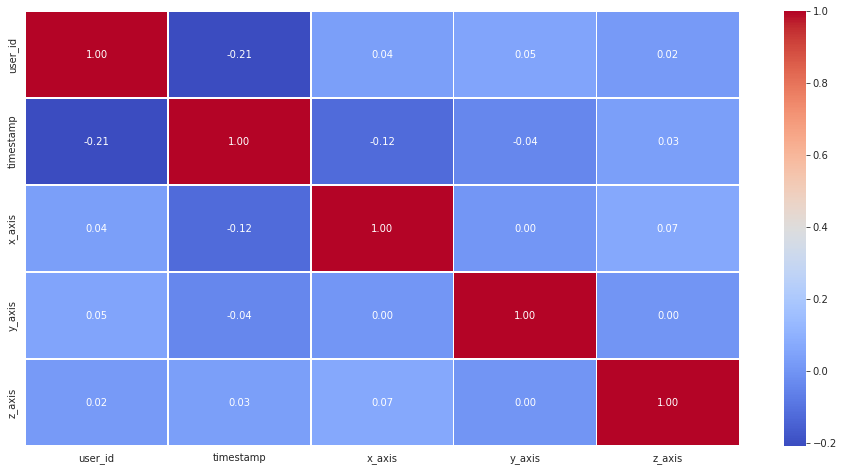

In [13]:
# Let's also draw a heatmap visualization of the correlation matrix

corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

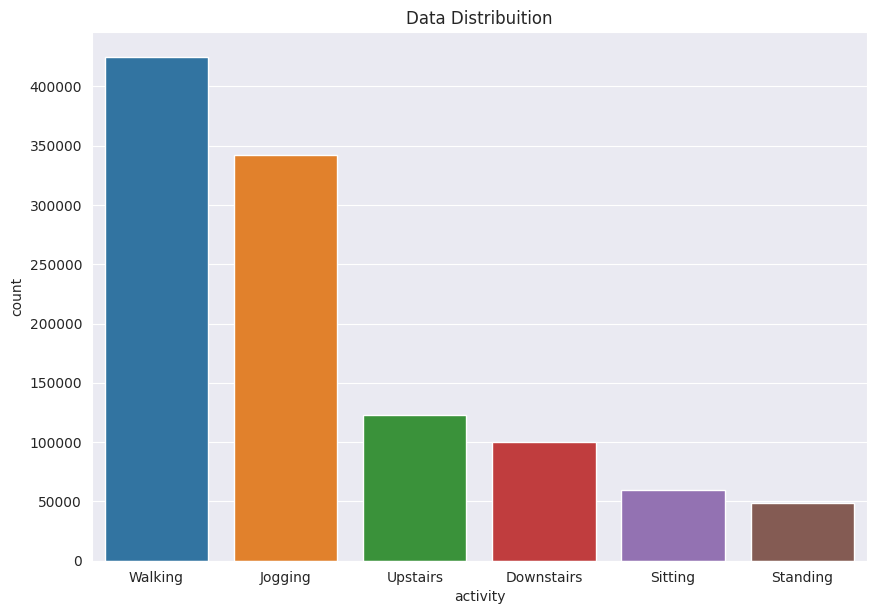

In [14]:
plt.figure(figsize=(10,7),dpi=100)
sns.countplot(x = 'activity',
              data = df,
              order = df.activity.value_counts().index)
plt.title('Data Distribuition')
#plt.suptitle('Prediction',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plt.savefig('P5_Class_01_DataDistri.png',bbox_inches='tight')

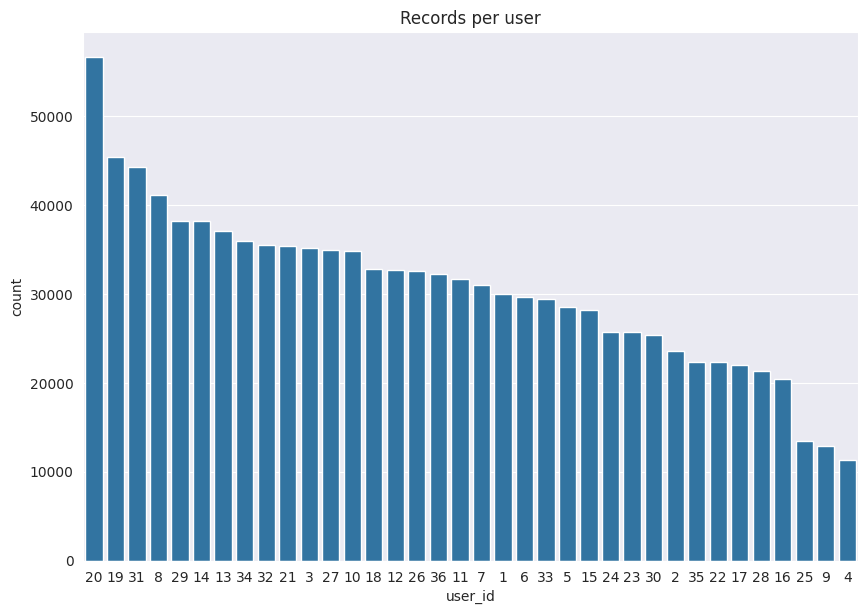

In [48]:
plt.figure(figsize=(10,7),dpi=100)
sns.countplot(x = 'user_id',
              data = df,
              palette=[sns.color_palette()[0]],
              order = df.user_id.value_counts().index);
plt.title("Records per user");
#plt.suptitle('Prediction',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plt.savefig('P5_Class_02_Records.png',bbox_inches='tight')

In [16]:
df.activity.unique()

array(['Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting',
       'Standing'], dtype=object)

In [17]:
user = df[df['user_id']==20]
print(user[user['activity']== 'Jogging' ].info())
print(user[user['activity']== 'Walking' ].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12948 entries, 21028 to 40434
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    12948 non-null  int64  
 1   activity   12948 non-null  object 
 2   timestamp  12948 non-null  int64  
 3   x_axis     12948 non-null  float64
 4   y_axis     12948 non-null  float64
 5   z_axis     12948 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 708.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13134 entries, 14353 to 33735
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    13134 non-null  int64  
 1   activity   13134 non-null  object 
 2   timestamp  13134 non-null  int64  
 3   x_axis     13134 non-null  float64
 4   y_axis     13134 non-null  float64
 5   z_axis     13134 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 718.3+ KB
Non

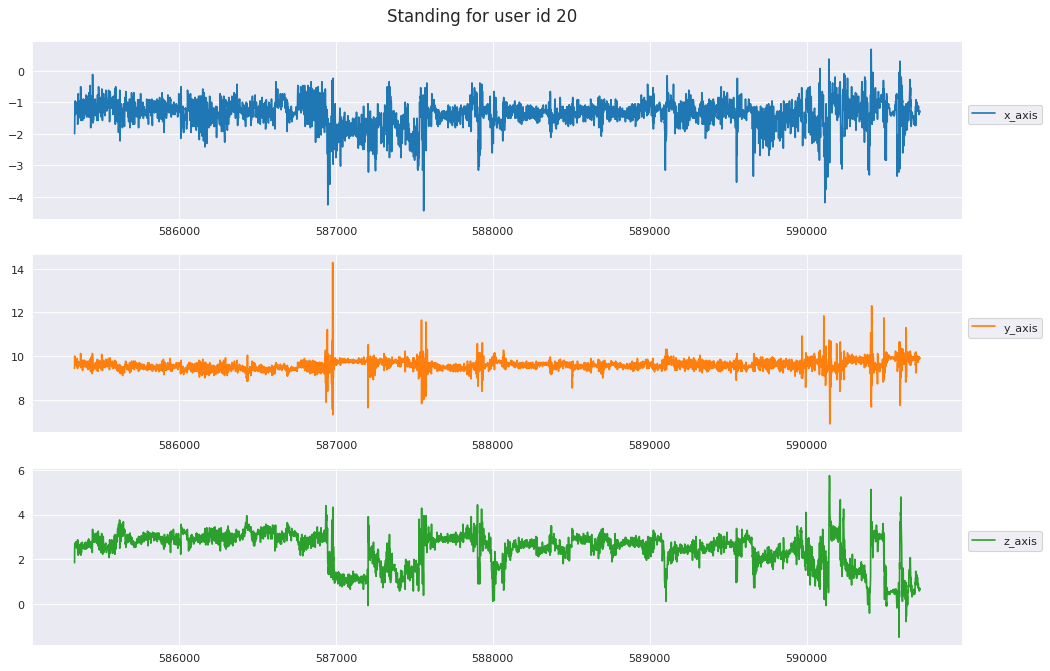

In [18]:
ids = 20
act = "Standing"

plt.figure(figsize=(15,10),dpi=80)
plt.suptitle(f'{act} for user id {ids}',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plot_user_timeseries(df,activity=act,id=ids)
#plt.suptitle('Prediction',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plt.savefig('P5_Class_03_TimeSeries.png',bbox_inches='tight')  
plt.show()

### Preprocessing

In [79]:
df_train = df[df['user_id'] <= 30]
df_test = df[df['user_id'] > 30]

In [80]:
#scale the accelerometer data values:
scale_columns = ['x_axis', 'y_axis', 'z_axis']
#Creating a Stadiration 
scaler = RobustScaler() 
scaler = scaler.fit(df_train[scale_columns])
df_train.loc[:, scale_columns] = scaler.transform(
  df_train[scale_columns].to_numpy()
)

df_test.loc[:, scale_columns] = scaler.transform(
  df_test[scale_columns].to_numpy()
)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [81]:
TIME_STEPS = 200
STEP = 40

X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']],
    df_train.activity,
    TIME_STEPS,
    STEP
)

X_test, y_test = create_dataset(
    df_test[['x_axis', 'y_axis', 'z_axis']],
    df_test.activity,
    TIME_STEPS,
    STEP
)

In [82]:
print(X_train.shape, y_train.shape)

(22454, 200, 3) (22454, 1)


In [83]:
#Tranforming each possibility in a binary vector
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc = enc.fit(y_train)
y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

## Model

In [88]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128,
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['acc']
)

In [89]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/20
632/632 [==============================] - 180s 279ms/step - loss: 1.4080 - acc: 0.5138 - val_loss: 1.2473 - val_acc: 0.5623
Epoch 2/20
632/632 [==============================] - 176s 279ms/step - loss: 1.2131 - acc: 0.5889 - val_loss: 1.0505 - val_acc: 0.6817
Epoch 3/20
632/632 [==============================] - 177s 280ms/step - loss: 1.0604 - acc: 0.6516 - val_loss: 0.8489 - val_acc: 0.7547
Epoch 4/20
632/632 [==============================] - 176s 278ms/step - loss: 0.8640 - acc: 0.7115 - val_loss: 0.7713 - val_acc: 0.7663
Epoch 5/20
632/632 [==============================] - 177s 281ms/step - loss: 0.7539 - acc: 0.7383 - val_loss: 1.2549 - val_acc: 0.7582
Epoch 6/20
632/632 [==============================] - 176s 279ms/step - loss: 0.6787 - acc: 0.7561 - val_loss: 0.8891 - val_acc: 0.7671
Epoch 7/20
632/632 [==============================] - 177s 280ms/step - loss: 0.6763 - acc: 0.7604 - val_loss: 0.6374 - val_acc: 0.8143
Epoch 8/20
632/632 [============================

## Results

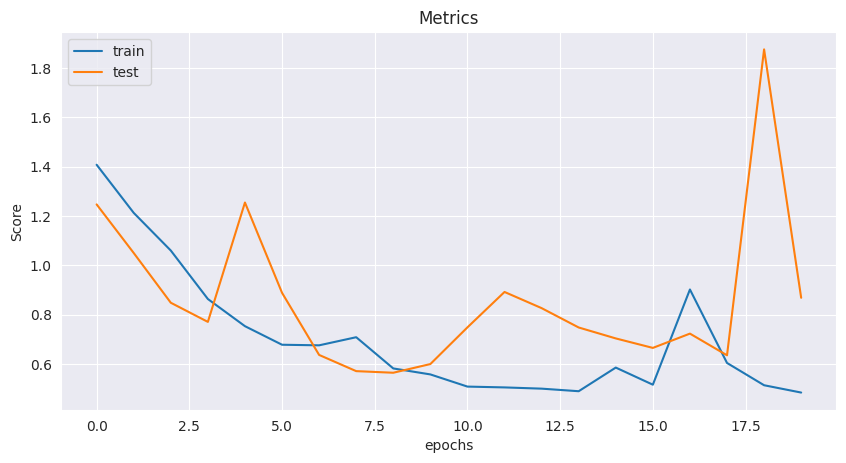

In [90]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Metrics')
plt.ylabel('Score')
plt.xlabel('epochs')
#plt.suptitle('Prediction',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plt.savefig('P5_Class_04_Metris.png',bbox_inches='tight')
plt.legend();

In [27]:
model.evaluate(X_test, y_test)

156/156 [==============================] - 11s 66ms/step - loss: 0.7207 - acc: 0.7794


[0.7207353711128235, 0.7794471383094788]

In [91]:
y_pred = model.predict(X_test)

In [92]:
y_test.shape

(4992, 6)

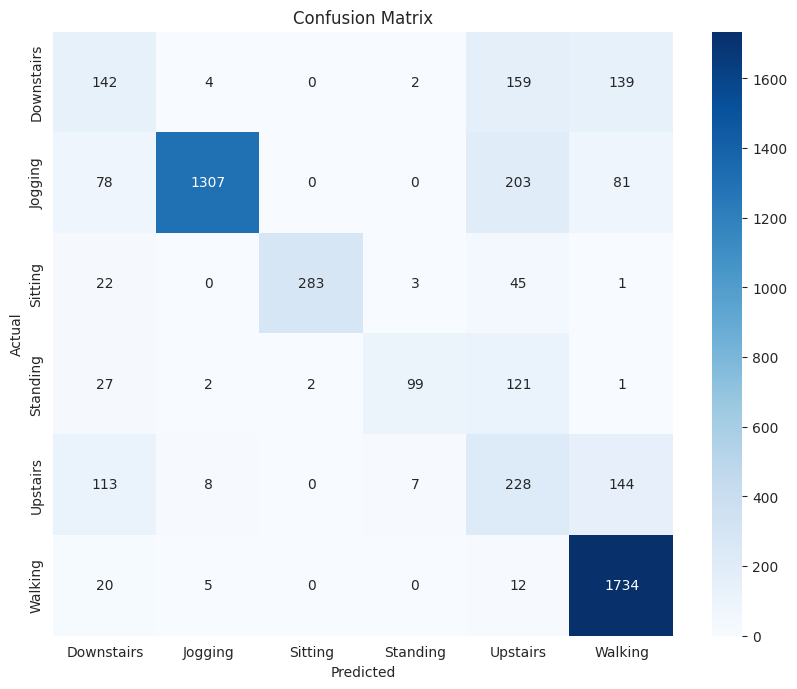

In [95]:
# Its import to explicity the necessity take the inverse of each vector

plot_cm(
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)
plt.savefig('P5_Class_05_ConfusionMatrix.png',bbox_inches='tight')
plt.show()

# Prediction Code

We will make to experiment. The first one will be for a single step prediction and the the second one to 10 steps ahead.

## Librarys

In [50]:
import matplotlib as mpl

In [51]:
def generate_time_series2(batch_size, n_steps,weigth1=0.5,weigth2=0.2,weigth3=0.1,):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = weigth1 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += weigth2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += weigth3 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [52]:
# np.random.seed(42)

# n_steps = 50
# series = generate_time_series(10000, n_steps + 1)
# X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
# X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
# X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [53]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)


In [54]:
#Generate data
n_steps = 100
series = generate_time_series2(10000, n_steps + 1,weigth2=0,weigth3=0)
#Split into Validation test
X_train, y_train = series[:7000,:n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

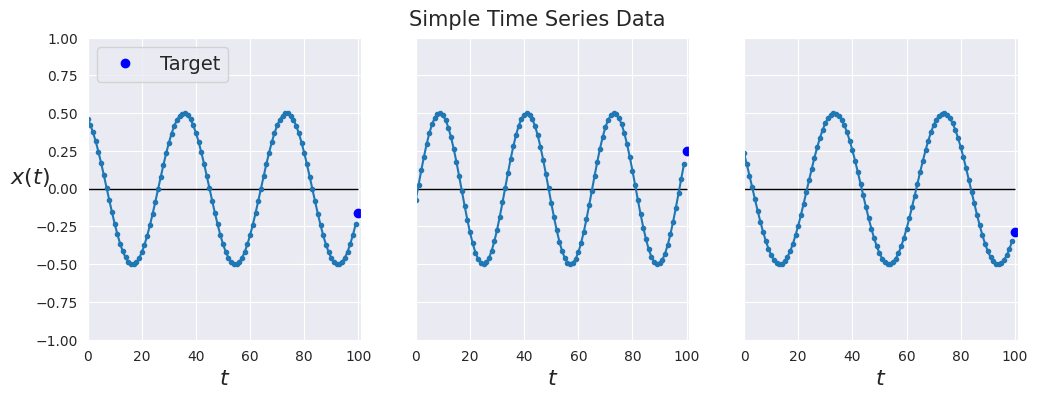

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4),dpi=100)
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.suptitle('Simple Time Series Data',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plt.savefig('P5_Predic_01_data.png',bbox_inches='tight') 
plt.show()

In [56]:
from tensorflow.python import metrics
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

model_pred = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.005)
model_pred.compile(loss="mse", optimizer=optimizer)
history_pred = model_pred.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 11s 43ms/step - loss: 0.0015 - val_loss: 3.1032e-05
Epoch 2/20
219/219 [==============================] - 7s 34ms/step - loss: 3.0054e-05 - val_loss: 3.1241e-05
Epoch 3/20
219/219 [==============================] - 7s 33ms/step - loss: 1.9734e-05 - val_loss: 1.9612e-05
Epoch 4/20
219/219 [==============================] - 7s 33ms/step - loss: 1.6671e-05 - val_loss: 1.2409e-05
Epoch 5/20
219/219 [==============================] - 7s 33ms/step - loss: 1.0937e-05 - val_loss: 5.5923e-06
Epoch 6/20
219/219 [==============================] - 7s 33ms/step - loss: 7.0017e-06 - val_loss: 7.4334e-06
Epoch 7/20
219/219 [==============================] - 7s 33ms/step - loss: 9.5345e-06 - val_loss: 4.8826e-06
Epoch 8/20
219/219 [==============================] - 7s 34ms/step - loss: 1.5402e-05 - val_loss: 2.6845e-06
Epoch 9/20
219/219 [==============================] - 7s 33ms/step - loss: 7.3229e-06 - val_loss: 4.7968e-05
Epoch 10/20
219/219 [=

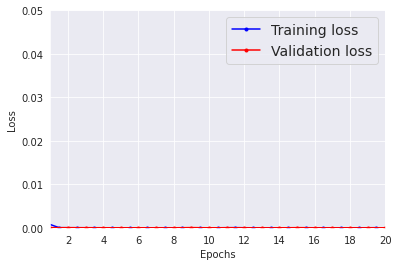

<Figure size 600x400 with 0 Axes>

In [57]:
plot_learning_curves(history_pred.history["loss"], history_pred.history["val_loss"])
plt.figure(dpi=100)
plt.suptitle('Metrics',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plt.savefig('P5_Predic_02_metrisM1.png',bbox_inches='tight')
plt.show()

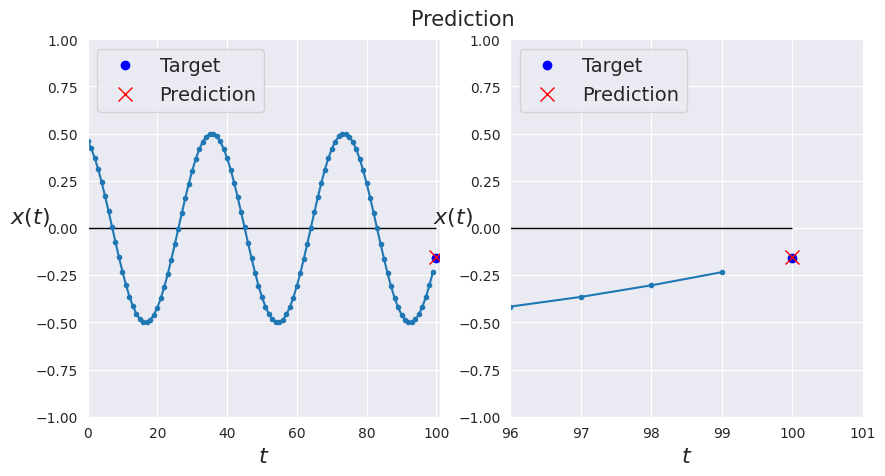

In [58]:
y_pred = model_pred.predict(X_valid)

plt.figure(figsize=(10,5),dpi=100)
plt.subplot(1,2,1)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])

plt.subplot(1,2,2)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.xlim(96,101)

plt.suptitle('Prediction',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plt.savefig('P5_Predic_03_predicM1.png',bbox_inches='tight')
plt.show()

## Forecast Several Steps Ahead

In [59]:
np.random.seed(43) # not 42, as it would give the first series in the train set

series = generate_time_series2(1, n_steps + 10,weigth2=0,weigth3=0)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model_pred.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

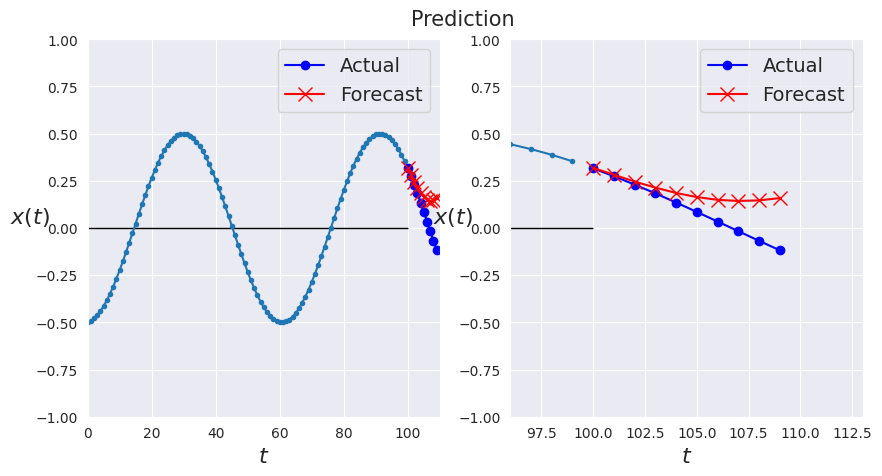

In [60]:
#save_fig("forecast_ahead_plot")

plt.figure(figsize=(10,5),dpi=100)
plt.subplot(1,2,1)
plot_multiple_forecasts(X_new, Y_new, Y_pred)

plt.subplot(1,2,2)
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.xlim(96,113)

plt.suptitle('Prediction',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plt.savefig('P5_Predic_04_preMULTM1.png',bbox_inches='tight')
plt.show()


plt.show()

Model 2

In [61]:
np.random.seed(42)

n_steps = 50
series = generate_time_series2(10000, n_steps + 10,weigth2=0,weigth3=0)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [62]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 6s 19ms/step - loss: 0.0222 - last_time_step_mse: 0.0133 - val_loss: 0.0111 - val_last_time_step_mse: 0.0026
Epoch 2/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0090 - last_time_step_mse: 0.0025 - val_loss: 0.0065 - val_last_time_step_mse: 0.0017
Epoch 3/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0057 - last_time_step_mse: 0.0014 - val_loss: 0.0045 - val_last_time_step_mse: 7.6874e-04
Epoch 4/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0043 - last_time_step_mse: 6.8164e-04 - val_loss: 0.0038 - val_last_time_step_mse: 5.0119e-04
Epoch 5/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0039 - last_time_step_mse: 5.0320e-04 - val_loss: 0.0034 - val_last_time_step_mse: 2.2668e-04
Epoch 6/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0037 - last_time_step_mse: 4.5425e-04 - val_loss: 0.0032 - val_last_time_step_mse: 2.323

In [63]:
np.random.seed(43)

series = generate_time_series2(1, n_steps + 10,weigth2=0,weigth3=0)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

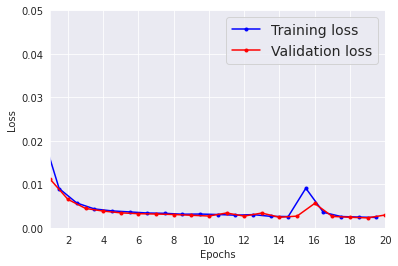

<Figure size 600x400 with 0 Axes>

In [64]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.figure(dpi=100)
plt.suptitle('Metrics',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plt.savefig('P5_Predic_05_metrisM2.png',bbox_inches='tight')
plt.show()

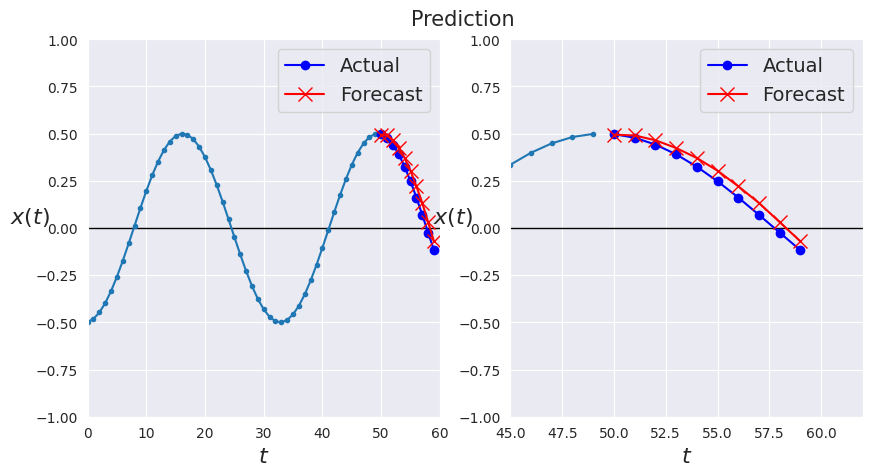

In [65]:

plt.figure(figsize=(10,5),dpi=100)
plt.subplot(1,2,1)
plot_multiple_forecasts(X_new, Y_new, Y_pred)

plt.subplot(1,2,2)
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.xlim(45,62)

plt.suptitle('Prediction',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plt.savefig('P5_Predic_06_preMULTM2.png',bbox_inches='tight')
plt.show()

#plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [66]:
!zip -r /content/All_Files.zip /content

updating: content/ (stored 0%)
updating: content/.config/ (stored 0%)
updating: content/.config/configurations/ (stored 0%)
updating: content/.config/configurations/config_default (deflated 15%)
updating: content/.config/active_config (stored 0%)
updating: content/.config/config_sentinel (stored 0%)
updating: content/.config/logs/ (stored 0%)
updating: content/.config/logs/2022.09.14/ (stored 0%)
updating: content/.config/logs/2022.09.14/13.44.23.609544.log (deflated 53%)
updating: content/.config/logs/2022.09.14/13.43.34.754807.log (deflated 54%)
updating: content/.config/logs/2022.09.14/13.43.12.857966.log (deflated 91%)
updating: content/.config/logs/2022.09.14/13.44.22.887116.log (deflated 54%)
updating: content/.config/logs/2022.09.14/13.44.02.480346.log (deflated 54%)
updating: content/.config/logs/2022.09.14/13.43.54.433400.log (deflated 86%)
updating: content/.config/gce (stored 0%)
updating: content/.config/.last_update_check.json (deflated 23%)
updating: content/.config/.last

# References

[HAYKIN, Simon. Redes Neurais: Princípios e prática. Porto Alegre
RS:Bookman, 2001.](https://www.amazon.com.br/Redes-Neurais-Princ%C3%ADpios-Simon-Haykin-ebook/dp/B073QSG69Y)

[Data Preprocessing 03: RobustScaler Sklearn| Machine Learning| Python](https://youtu.be/1lCWNcR4iW0)

https://www.kaggle.com/code/szaitseff/classification-of-time-series-with-lstm-rnn/notebook


https://towardsdatascience.com/time-series-classification-for-human-activity-recognition-with-lstms-using-tensorflow-2-and-keras-b816431afdff

https://heartbeat.comet.ml/anomaly-detection-using-lstm-autoencoder-b03289895fef

